In [7]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

import glob
import pandas as pd
import glob

ERROR: File `u'! DEFAULT PLOT THINGIES.ipynb.py'` not found.


<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-viscous-scale
Populating the interactive namespace from numpy and matplotlib


In [8]:
basepath = r"E:\Merlijn Biax\201410"
measurements = glob.glob(basepath + "/*~A*~w*")

for i,measurement in enumerate(measurements):
    t, imid, Bpos, CDpos = np.array([[float(l.replace(",", ".")) for l in line.split()] for line in open(measurement  + "/position.csv")]).T
    Bpos[Bpos>2**16] -= 2**32
    CDpos[CDpos>2**16] -= 2**32
    
    print np.amax(Bpos), np.amin(Bpos)

23795.0 -23828.0
23885.0 -23738.0
23864.0 -23787.0
23903.0 -24962.0
23808.0 -23815.0
23876.0 -23800.0
23769.0 -23854.0
23822.0 -23801.0
23823.0 -23796.0
23540.0 -26532.0
23798.0 -23822.0
23795.0 -23821.0
23837.0 -23793.0
23971.0 -23650.0
23846.0 -23776.0
23734.0 -24198.0
23750.0 -23869.0
23818.0 -23809.0
25145.0 -24086.0
25609.0 -24004.0
23763.0 -23891.0
23657.0 -24589.0
23790.0 -23832.0
23740.0 -23935.0
23824.0 -23799.0
23399.0 -27499.0
24924.0 -24530.0
23817.0 -23806.0
23948.0 -23766.0
23740.0 -24138.0
25777.0 -24271.0
23783.0 -23849.0
25425.0 -24343.0
23777.0 -23843.0
23808.0 -23814.0
23808.0 -23812.0
23860.0 -23764.0
24116.0 -24373.0
23755.0 -23955.0
24135.0 -23949.0
23822.0 -23807.0
24034.0 -23601.0
23809.0 -23809.0
23825.0 -23795.0
23493.0 -26050.0
23785.0 -23830.0
23833.0 -23795.0
23781.0 -23848.0
23839.0 -23884.0
23720.0 -23972.0
23788.0 -23961.0
23803.0 -23819.0
24472.0 -24923.0


In [9]:
ws = []
for i,measurement in enumerate(measurements):
    n = os.path.split(measurement)[-1]
    t, a, w = n.split("~")
    a = float(a[1] + "." + a[2:])
    w = float(w[1:].replace(",", "."))
    ws.append(w)
        
print np.unique(ws)

[ 0.01   0.017  0.028  0.046  0.077  0.129  0.215  0.359  0.599  1.   ]


In [10]:
for i,measurement in enumerate(measurements):
    n = os.path.split(measurement)[-1]
    t, a, w = n.split("~")
    a = float(a[1] + "." + a[2:])
    w = float(w[1:].replace(",", "."))
    if w > 0.013:
        print w
        continue
    fn = measurement + "/diffs_vs_0_latestart.npy"
    if not os.path.exists(fn):
        t, imid, Bpos, CDpos = np.array([[float(l.replace(",", ".")) for l in line.split()] for line in open(measurement  + "/position.csv")]).T

        print i,w
        Bpos[Bpos>2**16] -= 2**32
        CDpos[CDpos>2**16] -= 2**32
        
        startframe = np.where(np.diff(Bpos > 0))[0][1]

        baseimg = imread(measurement + "/%05i.png" % startframe)[550:800,400:650]

        diffdata = [sum( ( imread(measurement + "/%05i.png" % i)[550:800,400:650] - baseimg) ** 2) for i in imid]

        np.save(fn, np.array([t, imid, Bpos, CDpos, diffdata]).T)
    else:
        t, imid, Bpos, CDpos, diffdata = np.load(fn).T
    break

0.028
0.017
0.215
0.599
0.017
0.215
0.129
0.017
0.028
1.0
0.046
0.077


In [6]:
reallyslowdiffdata = diffdata

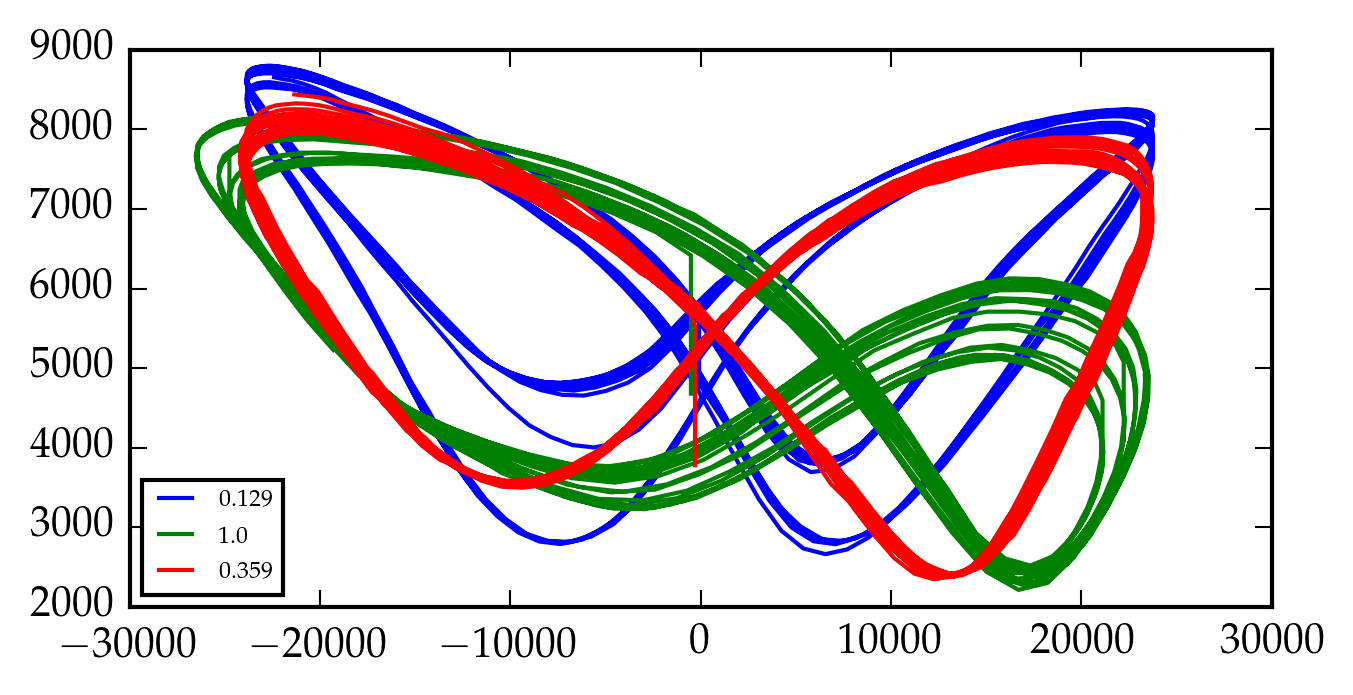

In [170]:
gehad = []

for i,measurement in enumerate(measurements):
    n = os.path.split(measurement)[-1]
    t, a, w = n.split("~")
    a = float(a[1] + "." + a[2:])
    w = float(w[1:].replace(",", "."))
    if np.round(np.log(w),1) in [0,-1,-2]:
        if w in gehad:
            continue
        gehad.append(w)
        t, imid, Bpos, CDpos, diffdata = np.load(measurement + "/diffs_vs_0.npy").T
        plt.plot(Bpos[100:], diffdata[100:], label=str(w))
        
plt.legend(loc='best', fontsize='xx-small')

In [11]:
results = []

for i,measurement in enumerate(measurements):
    n = os.path.split(measurement)[-1]
    t, a, w = n.split("~")
    a = float(a[1] + "." + a[2:])
    w = float(w[1:].replace(",", "."))
    fn = measurement + "/diffs_vs_0.npy"
    if not os.path.exists(fn):
        t, imid, Bpos, CDpos = np.array([[float(l.replace(",", ".")) for l in line.split()] for line in open(measurement  + "/position.csv")]).T
        
        print i,w
        Bpos[Bpos>2**16] -= 2**32
        CDpos[CDpos>2**16] -= 2**32

        baseimg = imread(measurement + "/%05i.png" % 0)[550:800,400:650]

        diffdata = [sum( ( imread(measurement + "/%05i.png" % i)[550:800,400:650] - baseimg) ** 2) for i in imid]

        np.save(fn, np.array([t, imid, Bpos, CDpos, diffdata]).T)
    
    t, imid, Bpos, CDpos, diffdata = np.load(measurement + "/diffs_vs_0.npy").T
    t = imid*np.mean(t[imid>100]/imid[imid>100])
    X = sum(sin(2*w*t) * diffdata)
    Y = sum(cos(2*w*t) * diffdata)
    
    R = sqrt(X**2 + Y**2)
    theta = arctan(Y/X)
   
    inphase = (Bpos**2)[1:-1]
    _ = np.diff(Bpos**2)
    outphase = 0.5*(_[1:] + _[:-1])
    
    inphase = inphase[100:]
    outphase = outphase[100:]
    ddrs = diffdata[100:][1:-1]
    
    inphase = (inphase-np.mean(inphase)) / np.std(inphase)
    outphase = (outphase-np.mean(outphase)) / np.std(outphase)
    ddrs = (ddrs - np.mean(ddrs)) / np.std(ddrs)
    
    X = sum(inphase * ddrs)
    Y = sum(outphase * ddrs)
    theta2 = arctan(Y/X)
    
    results.append([a,w,R,theta,theta2])
    
results = np.array(results)

\includegraphics{notebooks/biax-viscous-scale/def-en-var-vs-t.pdf}


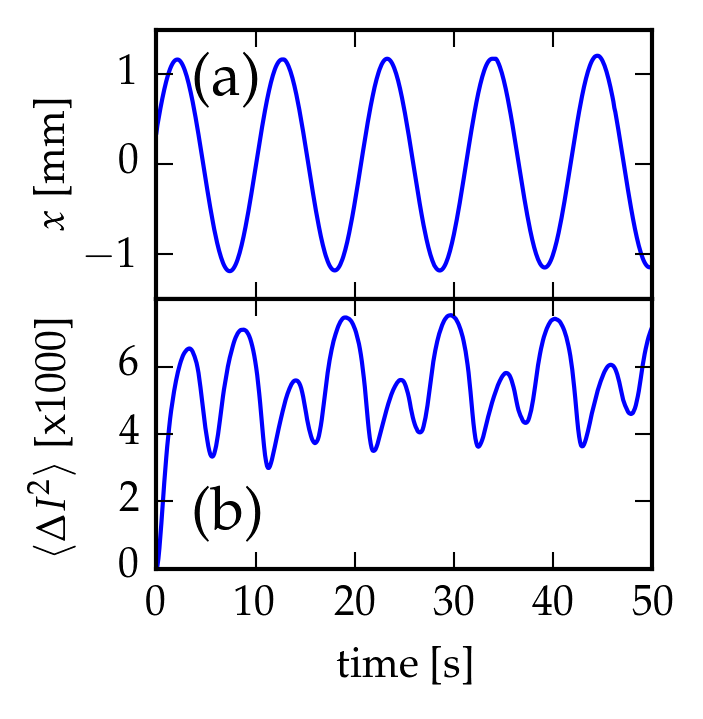

In [470]:
halffig()
plt.subplots_adjust(hspace=0)
xmax = 50 

ax1 = plt.subplot(211)
ax1.plot(t, Bpos * 4.95e-5) # mm/tick
ax1.set_ylabel("$x$ [mm]", labelpad=2)
ax1.set_yticks([-1,0,1])
ax1.set_xticklabels([])
ax1.axis(xmax=xmax, ymin=-1.5, ymax=1.5)

ax2 = plt.subplot(212)
ax2.plot(t, diffdata)
ax2.set_yticks([0,2000,4000,6000])
ax2.set_yticklabels(["0","2","4","6"])
ax2.set_ylabel(r"$\langle \Delta I^2 \rangle$ [x1000]", labelpad=10)
ax2.axis(xmax=xmax, ymax=8000)
ax2.set_xlabel("time [s]")

subplotlabel("(a)", ax=ax1, offsetx=10)
subplotlabel("(b)", loc='lower left', ax=ax2, offsetx=10, )

plt.savefig("def-en-var-vs-t.pdf")

[ 0.13518349] [[ 0.00010791]]
\includegraphics{notebooks/biax-viscous-scale/theta-vs-omega.pdf}


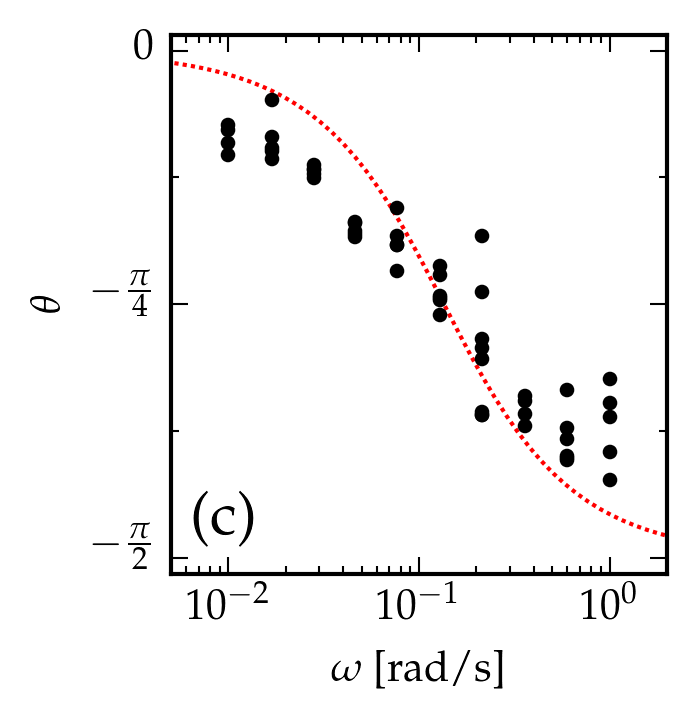

In [12]:
import scipy.optimize

x = results[:,1]
y = results[:,4]
halffig()
plt.plot(x, y, "k.")
plt.semilogx()

plt.axis(xmin=5e-3, xmax=2, ymin=-pi/2-0.05, ymax=0.05)

fn = lambda w, w0: np.arctan(-w/w0)
p, cov = scipy.optimize.curve_fit(fn, x, y, p0=(0.1,))
print p,cov
ws = np.logspace(-2.5, 0.5)
plt.plot(ws, fn(ws, *p), "r", dashes=(1,1), zorder=-10)

plt.gca().set_yticks(np.pi*np.array([-0.5, -0.25, 0]))
plt.gca().set_yticks(np.pi*np.array([-0.375, -0.125]), minor=True)
plt.gca().set_yticklabels([r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$0$"])
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\theta$")

subplotlabel("(c)", loc='lower left')

plt.savefig("theta-vs-omega.pdf")